# **Grover's Algorithm in Qiskit**
This notebook presents a clear, step-by-step implementation of Grover's Algorithm in Qiskit

**Introduction**:
Grover's algorithm is a quantum search algorithm that finds a marked element in an unsorted database with quadratic speedup over classical algorithms.

**Goal**: Efficiently find an input $( x^* $) such that $( f(x^*) = 1 $) using a quantum oracle.


In [15]:
# Install Qiskit and required libraries (if needed)
!pip install qiskit qiskit-aer matplotlib --quiet


In [16]:
# Import required modules
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


**Define the Oracle**

The oracle marks the target state by flipping its phase. This function allows marking any index.

In [17]:
def grover_oracle(n, marked_index):
    """
    Constructs a Grover oracle for a specific marked index.
    Args:
        n (int): Number of qubits.
        marked_index (int): Index to mark (target).
    Returns:
        QuantumCircuit: Oracle circuit.
    """
    oracle = QuantumCircuit(n)
    binary = format(marked_index, f'0{n}b')
    for i, bit in enumerate(binary[::-1]):  # Qiskit bit order
        if bit == '0':
            oracle.x(i)
    oracle.h(n-1)
    oracle.mcx(list(range(n-1)), n-1)
    oracle.h(n-1)
    for i, bit in enumerate(binary[::-1]):
        if bit == '0':
            oracle.x(i)
    return oracle


**Define the Diffusion Operator**

The diffusion operator amplifies the amplitude of the marked state.

In [18]:
def diffuser(n):
    """
    Constructs the Grover diffusion operator.
    Args:
        n (int): Number of qubits.
    Returns:
        QuantumCircuit: Diffuser circuit.
    """
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc


**Build and Run Grover's Algorithm**

Combining all components and running Grover's algorithm on a simulator.

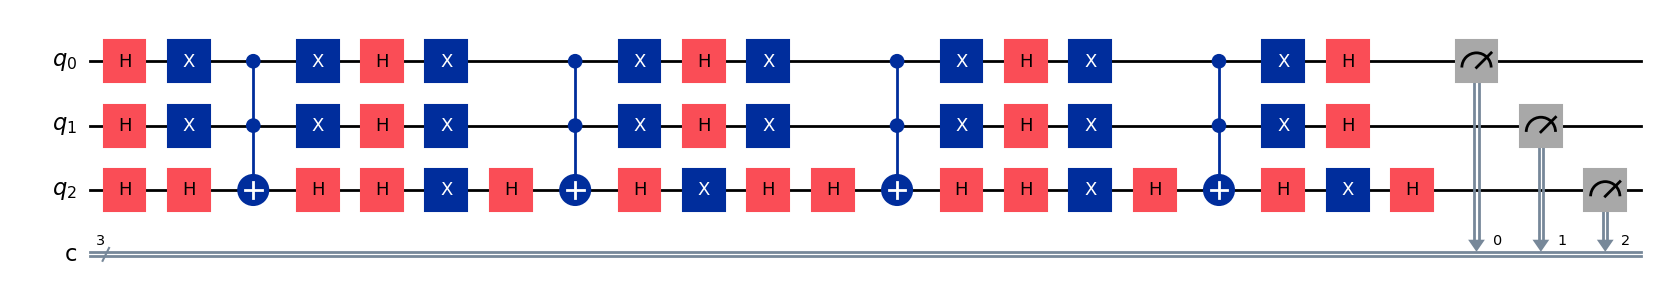

In [19]:
n = 3  # Number of qubits
N = 2 ** n
marked_index = 4  # The index to search for, f(x=4)=1

# Step 1: Initialize quantum circuit
grover_circuit = QuantumCircuit(n, n)
grover_circuit.h(range(n))  # Create superposition

# Step 2: Calculate optimal number of iterations
r = int(np.floor(np.pi/4 * np.sqrt(N)))

oracle = grover_oracle(n, marked_index)
diff = diffuser(n)

# Step 3: Apply Grover iterations
for _ in range(r):
    grover_circuit.compose(oracle, inplace=True)
    grover_circuit.compose(diff, inplace=True)

grover_circuit.measure(range(n), range(n))
grover_circuit.draw('mpl')


**Simulate and Visualize Output**

Run the algorithm on a simulator and visualize the output.

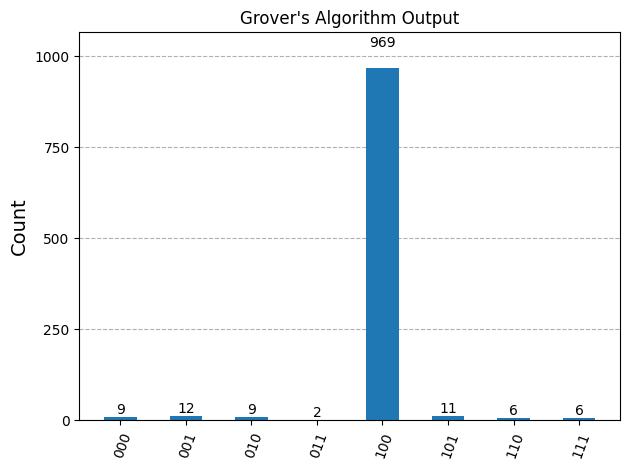

In [20]:
simulator = AerSimulator()
transpiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(transpiled_circuit, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts, title="Grover's Algorithm Output")


### Interpretation

The histogram shows the most probable output after applying Grover's operator multiple times.  
Ideally, the state corresponding to the marked index (in this case, `100`) has the highest probability.

---

**Initialization:**  
All states are equally probable after the Hadamard gates.

**Oracle:**  
The phase of the marked state is flipped.

**Diffusion:**  
Amplitudes are amplified for the marked state.

**Measurement:**  
The marked state appears with the highest probability.

---

**Optimal Iterations:**  
For a single marked item in \(N\) states, the optimal number of Grover iterations is  
$$
r = \left\lfloor \frac{\pi}{4} \sqrt{N} \right\rfloor
$$


This verifies that Grover's algorithm has successfully amplified the marked state's amplitude using a small number of iterations.
